<a href="https://colab.research.google.com/github/khanh11543/streamlit/blob/main/sales_data_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Nếu cần cài đặt thư viện
!pip install pandas matplotlib seaborn scikit-learn

# Nạp thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
# Tải lên file .csv từ máy
from google.colab import files
uploaded = files.upload()

# Đọc dữ liệu
df = pd.read_csv("sales_data.csv")  # hoặc diamonds.csv tùy tên
df.head()


Saving sales_data.csv to sales_data.csv


,carat\tcut\tcolor\tclarity\tdepth\ttable\tprice\tx\ty\tz
0,0.23\tIdeal\tE\tSI2\t61.5\t55\t326\t3.95\t3.98...
1,0.21\tPremium\tE\tSI1\t59.8\t61\t326\t3.89\t3....
2,0.23\tGood\tE\tVS1\t56.9\t65\t327\t4.05\t4.07\...
3,0.29\tPremium\tI\tVS2\t62.4\t58\t334\t4.2\t4.2...
4,0.31\tGood\tJ\tSI2\t63.3\t58\t335\t4.34\t4.35\...


In [7]:
import pandas as pd

# Đọc file với phân cách là tab
df = pd.read_csv("sales_data.csv", sep="\t")

# Xem 5 dòng đầu để kiểm tra
df.head()
# Kiểm tra missing value
df.info()
df.isnull().sum()

# Xử lý: loại bỏ các dòng thiếu
df = df.dropna()

# Chuyển kiểu dữ liệu nếu cần (ví dụ: 'price' sang numeric)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna()

# Mã hóa categorical nếu cần
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    22 non-null     float64
 1   cut      22 non-null     object 
 2   color    22 non-null     object 
 3   clarity  22 non-null     object 
 4   depth    22 non-null     float64
 5   table    22 non-null     int64  
 6   price    22 non-null     int64  
 7   x        22 non-null     float64
 8   y        22 non-null     float64
 9   z        22 non-null     float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.8+ KB


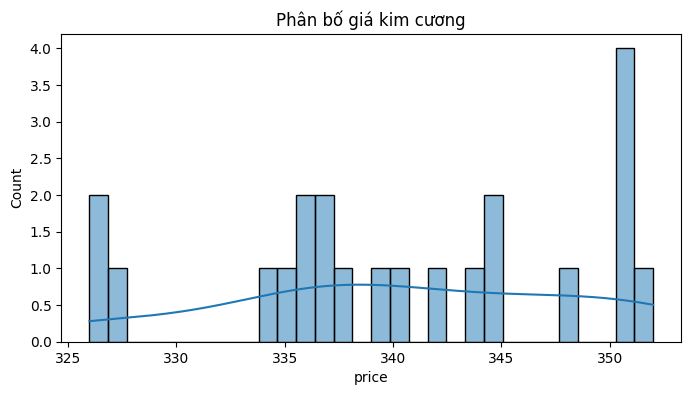

In [8]:
# Biểu đồ 1: Phân bố giá
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Phân bố giá kim cương")
plt.show()

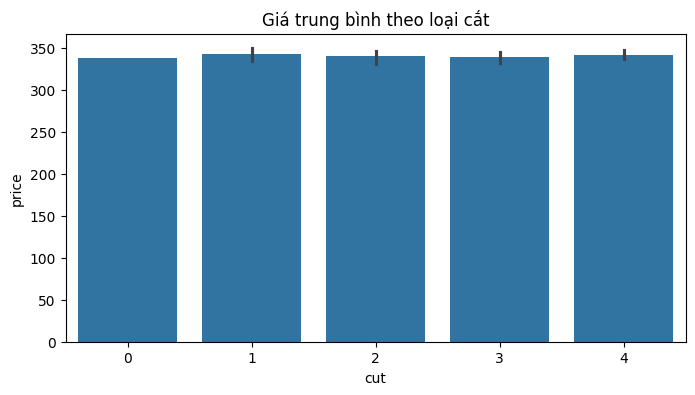

In [9]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='cut', y='price')
plt.title("Giá trung bình theo loại cắt")
plt.show()


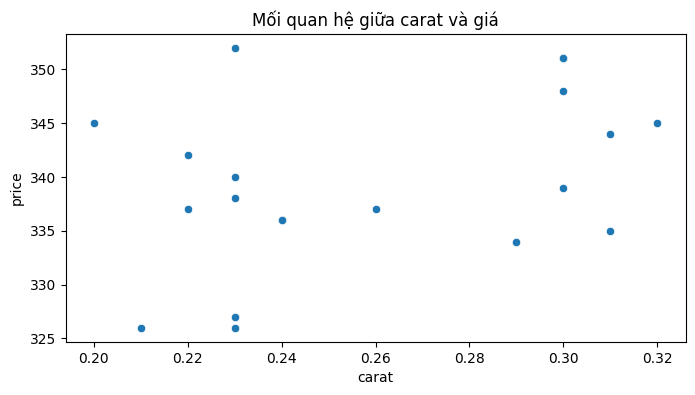

In [10]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='carat', y='price')
plt.title("Mối quan hệ giữa carat và giá")
plt.show()

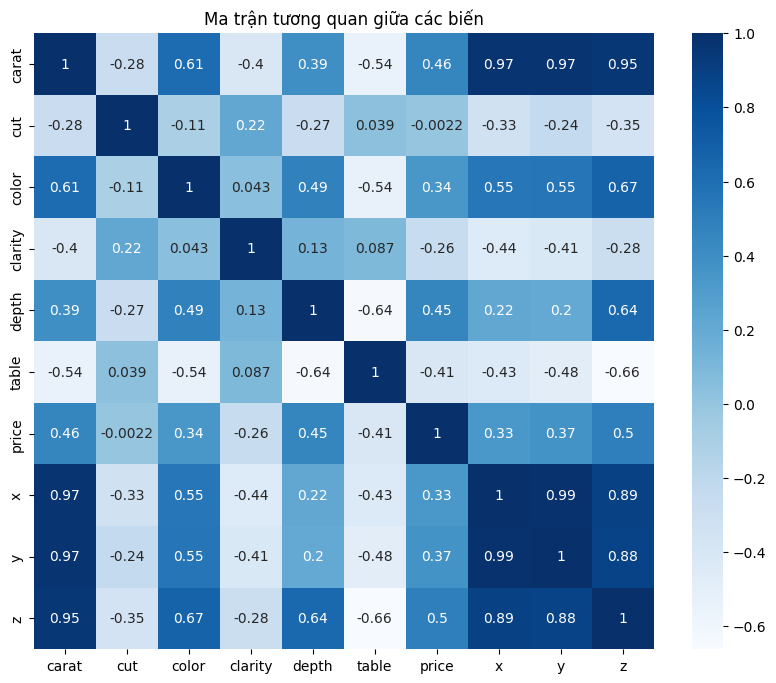

In [11]:
# Biểu đồ 4: Ma trận tương quan
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Ma trận tương quan giữa các biến")
plt.show()

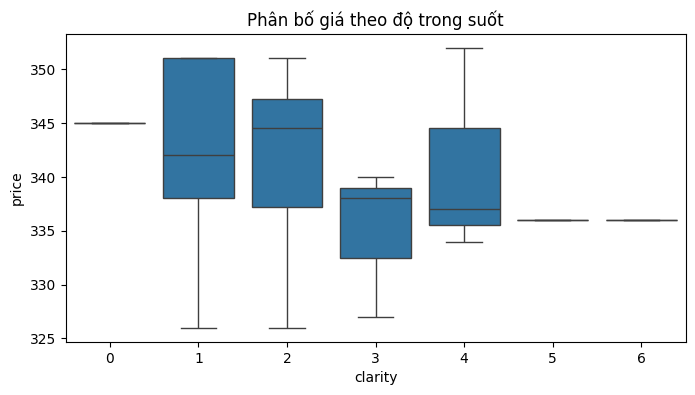

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='clarity', y='price')
plt.title("Phân bố giá theo độ trong suốt")
plt.show()

In [14]:
# Chọn biến đầu vào và đầu ra
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# Tách tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện model
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá model
print("MAE:", mean_absolute_error(y_test, y_pred))
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R² score:", r2_score(y_test, y_pred))


MAE: 13.882885713871293
RMSE: 19.175686985923353
R² score: -4.325999006113996


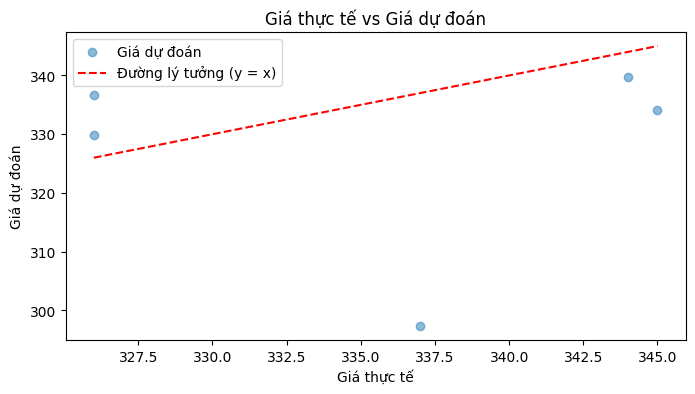

In [16]:
import numpy as np

plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, alpha=0.5, label="Giá dự đoán")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Đường lý tưởng (y = x)')
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.title("Giá thực tế vs Giá dự đoán")
plt.legend()
plt.show()
